In [16]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.models as models
from torch.utils.data import DataLoader
from torchvision import datasets
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score
from PIL import Image
import time

In [23]:
# 모델 로드
model_paths = {
    'ResNet18': '../models/resnet_18.pth',
    'ResNet34': '../models/resnet_34.pth',
    'ResNet50': '../models/resnet_50.pth',
    'ResNet101': '../models/resnet_101.pth',
    'ResNet152': '../models/resnet_152.pth'
}

In [24]:
# 모델 초기화
models_dict = {
    'ResNet18': models.resnet18(pretrained=False),
    'ResNet34': models.resnet34(pretrained=False),
    'ResNet50': models.resnet50(pretrained=False),
    'ResNet101': models.resnet101(pretrained=False),
    'ResNet152': models.resnet152(pretrained=False),
}

/opt/anaconda3/envs/cv/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/anaconda3/envs/cv/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [25]:
# 테스트 이미지 데이터셋 로드 및 전처리
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [26]:
test_dataset = datasets.ImageFolder(root='../data/test_data2', transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [27]:
# 모델 평가 함수
def evaluate_model(model, test_loader, device):
    model.to(device)
    model.eval()
    all_preds = []
    all_labels = []

    start_time = time.time()

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    end_time = time.time()
    elapsed_time = end_time - start_time

    return np.array(all_preds), np.array(all_labels), elapsed_time

In [30]:
from sklearn.metrics import accuracy_score

# 성능 평가 및 시각화
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
results = []

for model_name, model_path in model_paths.items():
    model = models_dict[model_name]
    # Modify the final fully connected layer to match the number of classes
    num_classes = 4  # Change this to the number of classes in your dataset
    model.fc = nn.Linear(model.fc.in_features, num_classes)
    
    model.load_state_dict(torch.load(model_path), strict=False)

    preds, labels, elapsed_time = evaluate_model(model, test_loader, device)

    acc = accuracy_score(labels, preds)     
    precision = precision_score(labels, preds, average='macro')
    recall = recall_score(labels, preds, average='macro')
    f1 = f1_score(labels, preds, average='macro')
    training_time = "N/A"
    inference_time = elapsed_time / len(test_loader.dataset)

    results.append([model_name, f"{acc * 100:.2f}%", training_time, f"{inference_time:.2f}s", 
                    f"{precision:.4f}", f"{recall:.4f}", f"{f1:.4f}"])
    
    print(f'**{model_name} Accuracy: {acc * 100:.2f}%**')

/var/folders/2p/670k4kqs5qx3_9gpj5s5jfxh0000gn/T/ipykernel_83879/1728959063.py:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path)

**ResNet18 Accuracy: 50.00%**


/opt/anaconda3/envs/cv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/var/folders/2p/670k4kqs5qx3_9gpj5s5jfxh0000gn/T/ipykernel_83879/1728959063.py:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are exp

**ResNet34 Accuracy: 25.00%**


/opt/anaconda3/envs/cv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/var/folders/2p/670k4kqs5qx3_9gpj5s5jfxh0000gn/T/ipykernel_83879/1728959063.py:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are exp

**ResNet50 Accuracy: 64.95%**


/opt/anaconda3/envs/cv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/var/folders/2p/670k4kqs5qx3_9gpj5s5jfxh0000gn/T/ipykernel_83879/1728959063.py:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are exp

**ResNet101 Accuracy: 25.00%**
**ResNet152 Accuracy: 50.00%**


/opt/anaconda3/envs/cv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [32]:
# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Training Time', 'Inference Time', 'Precision', 'Recall', 'F1-Score'])

# Apply transformation
results_df['Training Time'] = results_df['Training Time'].apply(lambda x: 'N/A' if x == 'N/A' else x)

In [33]:
# 결과를 DataFrame으로 정리
results_df = pd.DataFrame(results, columns = ['Model', 'Accuracy', 'Training Time', 'Inference Time', 'Precision', 'Recall', 'F1-Score'])
results_df.sort_values(by='Accuracy', ascending=False, inplace=True)
results_df.reset_index(drop=True, inplace=True)

# 결과 출력
print(results_df)

       Model Accuracy Training Time Inference Time Precision  Recall F1-Score
0   ResNet50   64.95%           N/A          0.36s    0.5576  0.6495   0.5640
1   ResNet18   50.00%           N/A          0.16s    0.3333  0.5000   0.3750
2  ResNet152   50.00%           N/A          0.85s    0.3333  0.5000   0.3750
3   ResNet34   25.00%           N/A          0.19s    0.0625  0.2500   0.1000
4  ResNet101   25.00%           N/A          0.60s    0.0625  0.2500   0.1000


In [35]:
# 정확도 결과 시각화
model_names = [result[0] for result in results]
accuracies = [float(result[1].strip('%')) / 100 for result in results]

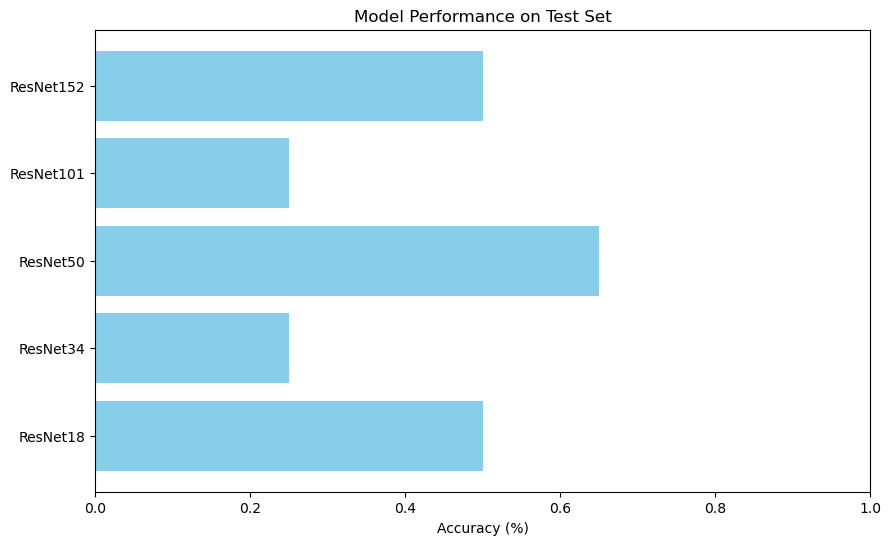

In [36]:
# 정확도 그래프
plt.figure(figsize=(10, 6))
plt.barh(model_names, accuracies, color='skyblue')
plt.xlabel('Accuracy (%)')
plt.title('Model Performance on Test Set')
plt.xlim(0, 1)
plt.show()

In [37]:
# 결과를 DataFrame으로 정리
results_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies
})

results_df.sort_values(by='Accuracy', ascending=False, inplace=True)
results_df.reset_index(drop=True, inplace=True)
print(results_df)

       Model  Accuracy
0   ResNet50    0.6495
1   ResNet18    0.5000
2  ResNet152    0.5000
3   ResNet34    0.2500
4  ResNet101    0.2500


accuracy, Training time, inference Time, Precision, Recall, F1-Score